In [1]:
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.stattools as smt
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style('whitegrid',{'grid.color':'0.95'})
import statsmodels.formula.api as smf
import matplotlib.dates as mdates

from tabulate import tabulate
from statsmodels.iolib.summary2 import summary_col
from lmfit import minimize, Parameters, report_fit
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from prettytable import PrettyTable
from IPython.display import display, Latex, HTML

In [2]:
dly=pd.date_range(start='1948/01/01',end='2016/03/31',freq='D')
print(dly)

DatetimeIndex(['1948-01-01', '1948-01-02', '1948-01-03', '1948-01-04',
               '1948-01-05', '1948-01-06', '1948-01-07', '1948-01-08',
               '1948-01-09', '1948-01-10',
               ...
               '2016-03-22', '2016-03-23', '2016-03-24', '2016-03-25',
               '2016-03-26', '2016-03-27', '2016-03-28', '2016-03-29',
               '2016-03-30', '2016-03-31'],
              dtype='datetime64[ns]', length=24928, freq='D')


In [3]:
date=pd.DataFrame(dly)
date.columns=['daily']
print(date.head(n=3),'\n\n',date.tail(n=3))

       daily
0 1948-01-01
1 1948-01-02
2 1948-01-03 

            daily
24925 2016-03-29
24926 2016-03-30
24927 2016-03-31


In [4]:
date['freq']=np.nan
for i in range(1,len(date.daily)):
    date['freq']=date.daily[i]-date.daily[i-1]
print(date.head(n=3),'\n\n',date.tail(n=3))

       daily   freq
0 1948-01-01 1 days
1 1948-01-02 1 days
2 1948-01-03 1 days 

            daily   freq
24925 2016-03-29 1 days
24926 2016-03-30 1 days
24927 2016-03-31 1 days


In [5]:
date=date.set_index(keys='daily')
print(date.head(),'\n',date.tail())

             freq
daily            
1948-01-01 1 days
1948-01-02 1 days
1948-01-03 1 days
1948-01-04 1 days
1948-01-05 1 days 
              freq
daily            
2016-03-27 1 days
2016-03-28 1 days
2016-03-29 1 days
2016-03-30 1 days
2016-03-31 1 days


In [6]:
qtr=pd.date_range(start='1948/01/01',end='2016/03/31',freq='QE')
print(qtr)

DatetimeIndex(['1948-03-31', '1948-06-30', '1948-09-30', '1948-12-31',
               '1949-03-31', '1949-06-30', '1949-09-30', '1949-12-31',
               '1950-03-31', '1950-06-30',
               ...
               '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30',
               '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30',
               '2015-12-31', '2016-03-31'],
              dtype='datetime64[ns]', length=273, freq='QE-DEC')


In [7]:
print('The data type and number of quarterly dates are',
      qtr.dtype, 'and',qtr.size,', respectively.\n')
print('The number of days between 1948Q1 and 1948Q2 is: ',
      qtr[1]-qtr[0])
print('The number of days between 1948Q4 and 1949Q1 is: ',
      qtr[4]-qtr[3])
print('The number of days between 2015Q4 and 2015Q3 is: ',
      qtr[271]-qtr[270])

The data type and number of quarterly dates are datetime64[ns] and 273 , respectively.

The number of days between 1948Q1 and 1948Q2 is:  91 days 00:00:00
The number of days between 1948Q4 and 1949Q1 is:  90 days 00:00:00
The number of days between 2015Q4 and 2015Q3 is:  92 days 00:00:00


In [8]:
qtrS=pd.date_range(start='1948/01/01',periods=273,freq='QS')
print(qtrS)

DatetimeIndex(['1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
               '1949-01-01', '1949-04-01', '1949-07-01', '1949-10-01',
               '1950-01-01', '1950-04-01',
               ...
               '2013-10-01', '2014-01-01', '2014-04-01', '2014-07-01',
               '2014-10-01', '2015-01-01', '2015-04-01', '2015-07-01',
               '2015-10-01', '2016-01-01'],
              dtype='datetime64[ns]', length=273, freq='QS-JAN')


In [9]:
hr=pd.date_range(start='1948/01/01',periods=596089,freq='h')
print(hr,'\n')
print('Incremental hourly difference between list objects [1] and [0] is:')
print(hr[1]-hr[0], 'hour')

DatetimeIndex(['1948-01-01 00:00:00', '1948-01-01 01:00:00',
               '1948-01-01 02:00:00', '1948-01-01 03:00:00',
               '1948-01-01 04:00:00', '1948-01-01 05:00:00',
               '1948-01-01 06:00:00', '1948-01-01 07:00:00',
               '1948-01-01 08:00:00', '1948-01-01 09:00:00',
               ...
               '2015-12-31 15:00:00', '2015-12-31 16:00:00',
               '2015-12-31 17:00:00', '2015-12-31 18:00:00',
               '2015-12-31 19:00:00', '2015-12-31 20:00:00',
               '2015-12-31 21:00:00', '2015-12-31 22:00:00',
               '2015-12-31 23:00:00', '2016-01-01 00:00:00'],
              dtype='datetime64[ns]', length=596089, freq='h') 

Incremental hourly difference between list objects [1] and [0] is:
0 days 01:00:00 hour


In [10]:
poe5csv='http://principlesofeconometrics.com/poe5/data/csv/'
vars=['dateid01','u','g']
usm=pd.read_csv(poe5csv+'usmacro.csv',sep=',',usecols=vars)
print(usm.head(),'\n')
print('Data Types of DataFrame')
print(usm.dtypes)

    dateid01      g    u
0   1/1/1948  2.267  3.7
1   4/1/1948  2.517  3.7
2   7/1/1948  2.418  3.8
3  10/1/1948  0.429  3.8
4   1/1/1949 -1.888  4.7 

Data Types of DataFrame
dateid01     object
g           float64
u           float64
dtype: object


In [11]:
usm['dateid01']=pd.to_datetime(usm.dateid01,format='%m/%d/%Y')
print(usm.head(),'\n')
print('Data Types of DataFrame')
print(usm.dtypes)

    dateid01      g    u
0 1948-01-01  2.267  3.7
1 1948-04-01  2.517  3.7
2 1948-07-01  2.418  3.8
3 1948-10-01  0.429  3.8
4 1949-01-01 -1.888  4.7 

Data Types of DataFrame
dateid01    datetime64[ns]
g                  float64
u                  float64
dtype: object


In [12]:
usm['quarter']=pd.PeriodIndex(usm.dateid01,freq='Q')
usm=usm.set_index('quarter')
print(usm.head(n=3),'\n',usm.tail(n=3),'\n')

          dateid01      g    u
quarter                       
1948Q1  1948-01-01  2.267  3.7
1948Q2  1948-04-01  2.517  3.7
1948Q3  1948-07-01  2.418  3.8 
           dateid01      g    u
quarter                       
2015Q3  2015-07-01  0.818  5.2
2015Q4  2015-10-01  0.579  5.0
2016Q1  2016-01-01  0.310  4.9 



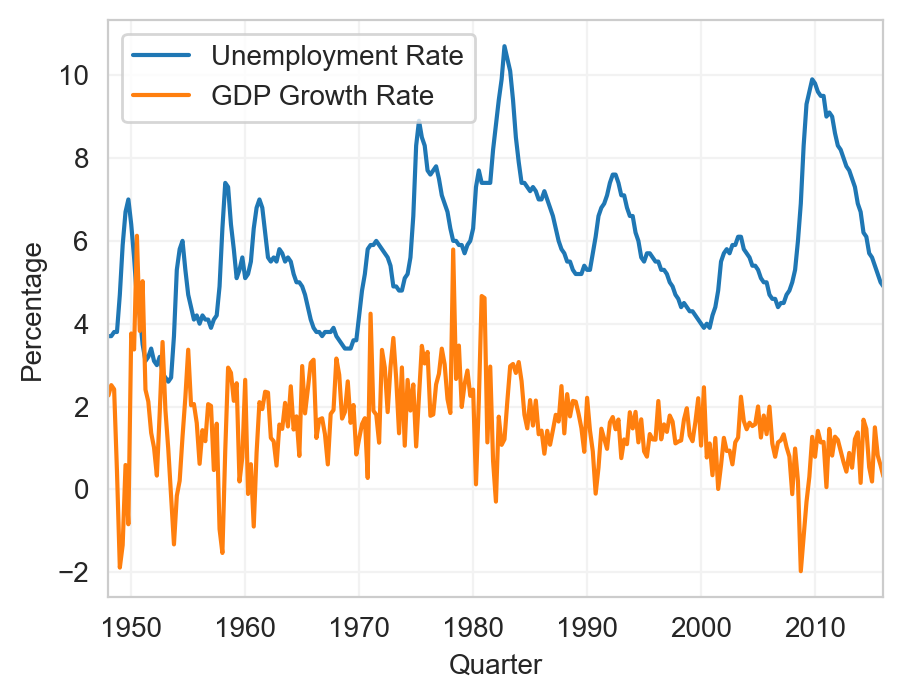

In [13]:
ax1=usm.u.plot(label='Unemployment Rate')
ax2=usm.g.plot(label='GDP Growth Rate')
plt.xlabel('Quarter')
plt.ylabel('Percentage')
plt.legend(loc=2)
plt.show()

In [14]:
print('Equivalent to .head(n=3):')
print(usm['1948Q1':'1948Q3'])

Equivalent to .head(n=3):
          dateid01      g    u
quarter                       
1948Q1  1948-01-01  2.267  3.7
1948Q2  1948-04-01  2.517  3.7
1948Q3  1948-07-01  2.418  3.8


In [15]:
print('Equivalent to .tail(n=3):')
print(usm['2015Q3':])

Equivalent to .tail(n=3):
          dateid01      g    u
quarter                       
2015Q3  2015-07-01  0.818  5.2
2015Q4  2015-10-01  0.579  5.0
2016Q1  2016-01-01  0.310  4.9


In [16]:
print('Arbitrary DataFrame Slice:')
print(usm['1968Q1':'1968Q4'])

Arbitrary DataFrame Slice:
          dateid01      g    u
quarter                       
1968Q1  1968-01-01  3.159  3.7
1968Q2  1968-04-01  2.766  3.6
1968Q3  1968-07-01  1.709  3.5
1968Q4  1968-10-01  1.869  3.4


In [17]:
print('Row Locator Approach to DataFrame Slicing')
print(usm[0:3])

Row Locator Approach to DataFrame Slicing
          dateid01      g    u
quarter                       
1948Q1  1948-01-01  2.267  3.7
1948Q2  1948-04-01  2.517  3.7
1948Q3  1948-07-01  2.418  3.8


In [18]:
print(usm.iloc[0:3,0:3])

          dateid01      g    u
quarter                       
1948Q1  1948-01-01  2.267  3.7
1948Q2  1948-04-01  2.517  3.7
1948Q3  1948-07-01  2.418  3.8


In [19]:
print(usm.iloc[0:3,1:3])

             g    u
quarter            
1948Q1   2.267  3.7
1948Q2   2.517  3.7
1948Q3   2.418  3.8


In [20]:
print(usm.iloc[80:84,1:3])

             g    u
quarter            
1968Q1   3.159  3.7
1968Q2   2.766  3.6
1968Q3   1.709  3.5
1968Q4   1.869  3.4


In [21]:
usm=usm[['g','u','dateid01']]
print(usm.iloc[0:3,0:2])

             g    u
quarter            
1948Q1   2.267  3.7
1948Q2   2.517  3.7
1948Q3   2.418  3.8


In [22]:
usm1=usm.copy()
usm1['L1u']=usm1.u.shift(periods=1)
usm1['L2u']=usm1.u.shift(periods=2)
usm1=usm1[['g','u','L1u','L2u','dateid01']]
print(usm1.iloc[0:5,0:4])

             g    u  L1u  L2u
quarter                      
1948Q1   2.267  3.7  NaN  NaN
1948Q2   2.517  3.7  3.7  NaN
1948Q3   2.418  3.8  3.7  3.7
1948Q4   0.429  3.8  3.8  3.7
1949Q1  -1.888  4.7  3.8  3.8


In [23]:
lags=[1,2,3]
for l in lags:
    usm1['L'+str(l)+'g']=usm1.g.shift(periods=l)
cols=['u','L1u','L2u','g','L1g','L2g','L3g']
usm1=usm1.reindex(columns=cols)
print(usm1.iloc[0:5,0:])

           u  L1u  L2u      g    L1g    L2g    L3g
quarter                                           
1948Q1   3.7  NaN  NaN  2.267    NaN    NaN    NaN
1948Q2   3.7  3.7  NaN  2.517  2.267    NaN    NaN
1948Q3   3.8  3.7  3.7  2.418  2.517  2.267    NaN
1948Q4   3.8  3.8  3.7  0.429  2.418  2.517  2.267
1949Q1   4.7  3.8  3.8 -1.888  0.429  2.418  2.517


In [24]:
usm1['F2u']=usm1.u.shift(periods=-2)
cols=['u','L1u','L2u','F2u','g','L1g','L2g','L3g']
usm1=usm1.reindex(columns=cols)
print(usm1.iloc[0:5,0:])

           u  L1u  L2u  F2u      g    L1g    L2g    L3g
quarter                                                
1948Q1   3.7  NaN  NaN  3.8  2.267    NaN    NaN    NaN
1948Q2   3.7  3.7  NaN  3.8  2.517  2.267    NaN    NaN
1948Q3   3.8  3.7  3.7  4.7  2.418  2.517  2.267    NaN
1948Q4   3.8  3.8  3.7  5.9  0.429  2.418  2.517  2.267
1949Q1   4.7  3.8  3.8  6.7 -1.888  0.429  2.418  2.517


In [25]:
usm1['D1u']=usm1.u.diff(1)
usm1=usm1[['u','L1u','L2u','F2u','D1u','g','L1g','L2g','L3g']]
print(usm1.head())

           u  L1u  L2u  F2u  D1u      g    L1g    L2g    L3g
quarter                                                     
1948Q1   3.7  NaN  NaN  3.8  NaN  2.267    NaN    NaN    NaN
1948Q2   3.7  3.7  NaN  3.8  0.0  2.517  2.267    NaN    NaN
1948Q3   3.8  3.7  3.7  4.7  0.1  2.418  2.517  2.267    NaN
1948Q4   3.8  3.8  3.7  5.9  0.0  0.429  2.418  2.517  2.267
1949Q1   4.7  3.8  3.8  6.7  0.9 -1.888  0.429  2.418  2.517


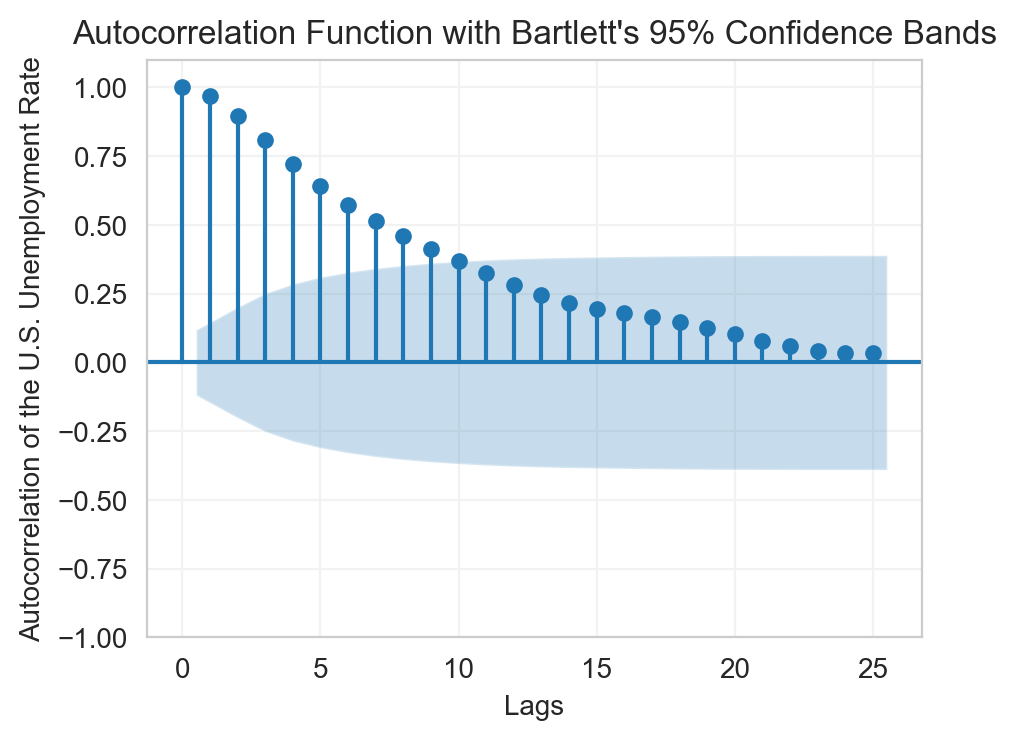

In [26]:
fig=sm.graphics.tsa.plot_acf(x=usm1.u,lags=25,alpha=0.05)
plt.title('Autocorrelation Function with Bartlett\'s 95% Confidence Bands')
plt.ylim(-1,1.1)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation of the U.S. Unemployment Rate')
plt.show()

In [27]:
lags=[i for i in range(26)]
acf_val,q,pval=smt.acf(x=usm1.u,nlags=25,qstat=True,adjusted=True,fft=True)
pacf_val=smt.pacf(x=usm1.u,nlags=25)
cgram_u=pd.DataFrame({'Lag':lags[1:],'acf':np.round(acf_val[1:],4),'pacf  ':pacf_val[1:],
                      'Q   ':q,'p-val':pval})
print('Autocorrelations and Partial Autocorrelations for Unemployment')
print(tabulate(cgram_u,headers='keys',colalign=
               ('center','center','center','right','right','center'),
               floatfmt=('.0f','.0f','.4f','.4f','.2f','.4f')))

Autocorrelations and Partial Autocorrelations for Unemployment
     Lag    acf      pacf       Q      p-val
--  -----  ------  --------  -------  -------
0     1    0.9709    0.9709   260.20  0.0000
1     2    0.9045   -0.6680   486.83  0.0000
2     3    0.8197    0.1092   673.66  0.0000
3     4    0.7316    0.0774   823.05  0.0000
4     5    0.6535    0.1585   942.70  0.0000
5     6    0.5872   -0.1163  1039.64  0.0000
6     7    0.5285   -0.0814  1118.48  0.0000
7     8    0.4750    0.0244  1182.39  0.0000
8     9    0.4282    0.1426  1234.53  0.0000
9    10    0.3828   -0.2164  1276.36  0.0000
10   11    0.3371   -0.0051  1308.92  0.0000
11   12    0.2941    0.0964  1333.81  0.0000
12   13    0.2571    0.1204  1352.90  0.0000
13   14    0.2271   -0.0973  1367.84  0.0000
14   15    0.2063    0.0429  1380.23  0.0000
15   16    0.1923   -0.0350  1391.03  0.0000
16   17    0.1774   -0.0730  1400.26  0.0000
17   18    0.1573   -0.0946  1407.55  0.0000
18   19    0.1346    0.1500  1412.90

In [28]:
lags=[i for i in range(6)]
acf_val,q,pval=smt.acf(x=usm1.g,nlags=5,qstat=True,adjusted=True,fft=True)
pacf_val=smt.pacf(x=usm1.g,nlags=5)
print('Autocorrelations and Partial Autocorrelatoins for the GDP Growth Rate')
cgram_g=pd.DataFrame({"Lag":lags[1:],'acf ':acf_val[1:],'pacf ':pacf_val[1:],'Q  ':q,
                      'p-val':np.round(pval,6)})
print(tabulate(cgram_g,headers='keys',
               colalign=('center','center','right','right','right','center'),
               floatfmt=('.0f','.0f','.4f','.4f','.2f','.4f')))

Autocorrelations and Partial Autocorrelatoins for the GDP Growth Rate
     Lag      acf     pacf      Q     p-val
--  -----  -------  -------  ------  -------
0     1     0.5090   0.5090   71.52  0.0000
1     2     0.3713   0.1514  109.71  0.0000
2     3     0.1506  -0.1200  116.02  0.0000
3     4     0.0860   0.0054  118.08  0.0000
4     5    -0.0249  -0.0720  118.26  0.0000


In [29]:
res=smf.ols('u~L1u+L2u+1',data=usm1,missing='drop').fit()
print(res.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      u   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
No. Observations:                 271   F-statistic:                     4022.
Covariance Type:            nonrobust   Prob (F-statistic):          1.36e-200
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2885      0.067      4.332      0.000       0.157       0.420
L1u            1.6128      0.046     35.295      0.000       1.523       1.703
L2u           -0.6621      0.046    -14.528      0.000      -0.752      -0.572

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [30]:
Intercept=res.params.iloc[0]
b_L1u=res.params.iloc[1]
b_L2u=res.params.iloc[2]
print(f'Estimated Intercept =  {Intercept:.4}')
print(f'L1u Coef Estimate   =  {b_L1u:.5}')
print(f'L2u Coef Estimate   = {b_L2u:.4}')

Estimated Intercept =  0.2885
L1u Coef Estimate   =  1.6128
L2u Coef Estimate   = -0.6621


In [31]:
uhat1=Intercept+b_L1u*usm1.u.iloc[272]+b_L2u*usm1.u.iloc[271]
uhat2=Intercept+b_L1u*uhat1+b_L2u*usm1.u.iloc[272]
uhat3=Intercept+b_L1u*uhat2+b_L2u*uhat1
print(f'uhat1= {uhat1:.6}')
print(f'uhat2= {uhat2:.6}')
print(f'uhat3= {uhat3:.6}')

uhat1= 4.88089
uhat2= 4.91629
uhat3= 4.98602


In [32]:
mse_resid=res.mse_resid
se1=np.sqrt(mse_resid)
se2=np.sqrt(mse_resid*(1+b_L1u**2))
se3=np.sqrt(mse_resid*(pow(pow(b_L1u,2)+b_L2u,2)+1+pow(b_L1u,2)))
cv=stats.t.ppf(1-0.025,268)
print(f'rmse/se1= {se1:.6}')
print(f'se2     = {se2:.6}')
print(f'se3     = {se3:.6}')
print(f't_025   = {cv:.6}')

rmse/se1= 0.294702
se2     = 0.55925
se3     = 0.799577
t_025   = 1.96886


In [33]:
lb1=uhat1-cv*se1
ub1=uhat1+cv*se1
lb2=uhat2-cv*se2
ub2=uhat2+cv*se2
lb3=uhat3-cv*se3
ub3=uhat3+cv*se3
print(f'95% Confidence Interval for uhat1: ({lb1:.3},{ub1:.3})')
print(f'95% Confidence Interval for uhat2: ({lb2:.3},{ub2:.3})')
print(f'95% Confidence Interval for uhat3: ({lb3:.3},{ub3:.3})')

95% Confidence Interval for uhat1: (4.3,5.46)
95% Confidence Interval for uhat2: (3.82,6.02)
95% Confidence Interval for uhat3: (3.41,6.56)


In [34]:
resarima200=ARIMA(endog=usm1['u'].iloc[2:273],order=(2,0,0)).fit()
print(resarima200.summary(),'\n')
uhat=resarima200.get_prediction(start=1,end=273)

                               SARIMAX Results                                
Dep. Variable:                      u   No. Observations:                  271
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -54.539
Date:                Wed, 18 Jun 2025   AIC                            117.078
Time:                        09:23:24   BIC                            131.487
Sample:                    09-30-1948   HQIC                           122.863
                         - 03-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7682      0.396     14.573      0.000       4.992       6.544
ar.L1          1.6126      0.035     45.671      0.000       1.543       1.682
ar.L2         -0.6616      0.035    -18.754      0.0

In [35]:
print('Quarterly Out-of-Sample Forecasts for the U.S. Unemployment Rate')
print('----------------------------------------------------------------')
print(uhat.summary_frame().iloc[270:273,]) 

Quarterly Out-of-Sample Forecasts for the U.S. Unemployment Rate
----------------------------------------------------------------
u           mean   mean_se  mean_ci_lower  mean_ci_upper
2016Q2  4.876377  0.293734       4.300668       5.452085
2016Q3  4.904438  0.557352       3.812048       5.996828
2016Q4  4.965318  0.796852       3.403516       6.527120


In [36]:
res=smf.ols('u~L1u+L2u+L1g+1',data=usm1,missing='drop').fit()
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3616      0.072      5.002      0.000       0.219       0.504
L1u            1.5331      0.056     27.597      0.000       1.424       1.642
L2u           -0.5818      0.056    -10.465      0.000      -0.691      -0.472
L1g           -0.0482      0.019     -2.475      0.014      -0.087      -0.010


In [37]:
columns=['dateid01','g']
data=[['4/1/2016',0.869],['7/1/2016',1.069]]
index=[273,274]
df=pd.DataFrame(data,index=index,columns=columns)
print(df)

     dateid01      g
273  4/1/2016  0.869
274  7/1/2016  1.069


In [38]:
usm2=pd.concat([usm1,df],axis=0)
usm2['quarter']=pd.PeriodIndex(usm2.dateid01,freq='Q')
usm2=usm2.set_index('quarter')
uhat1=(res.params.iloc[0]+res.params.iloc[1]*usm2.u.iloc[272]+
       res.params.iloc[2]*usm2.u.iloc[271]+res.params.iloc[3]*usm2.g.iloc[272])
uhat2=(res.params.iloc[0]+res.params.iloc[1]*uhat1+
       res.params.iloc[2]*usm2.u.iloc[272]+res.params.iloc[3]*usm2.g.iloc[273])
uhat3=(res.params.iloc[0]+res.params.iloc[1]*uhat2+
       res.params.iloc[2]*uhat1+res.params.iloc[3]*usm2.g.iloc[274])
print(f'uhat1 = {uhat1:.6}')
print(f'uhat2 = {uhat2:.6}')
print(f'uhat3 = {uhat3:.6}')

uhat1 = 4.94987
uhat2 = 5.05754
uhat3 = 5.18395


In [39]:
mse_resid=res.mse_resid
se1=np.sqrt(mse_resid)
se2=np.sqrt(mse_resid*(1+res.params.iloc[1]**2))
se3=np.sqrt(mse_resid*(pow(pow(res.params.iloc[1],2)+res.params.iloc[2],2)+
                       pow(res.params.iloc[1],2)+1))
t_025=stats.t.ppf(1-0.025,268)
print(f'se1  = {se1:.6}')
print(f'se2  = {se2:.6}')
print(f'se3  = {se3:.6}')
print(f't025 = {t_025:.6}')

se1  = 0.291923
se2  = 0.534339
se3  = 0.743022
t025 = 1.96886


In [40]:
lb1=uhat1-se1*t_025
ub1=uhat1+se1*t_025
lb2=uhat2-se2*t_025
ub2=uhat2+se2*t_025
lb3=uhat3-se3*t_025
ub3=uhat3+se3*t_025
print(f'95% Confidence Interval for uhat1: ({lb1:.4},{ub1:.4})')
print(f'95% Confidence Interval for uhat1: ({lb2:.4},{ub2:.4})')
print(f'95% Confidence Interval for uhat1: ({lb3:.4},{ub3:.4})')

95% Confidence Interval for uhat1: (4.375,5.525)
95% Confidence Interval for uhat1: (4.006,6.11)
95% Confidence Interval for uhat1: (3.721,6.647)


In [41]:
usm3=usm.copy()
for i in range(1,9):
    usm3['L'+str(i)+'g']=usm3['g'].shift(i)
    usm3['L'+str(i)+'u']=usm3['u'].shift(i) 
res=smf.ols('u~L1u+L2u+L1g+1',missing='drop',data=usm3).fit()
print(res.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      u   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
No. Observations:                 271   F-statistic:                     2734.
Covariance Type:            nonrobust   Prob (F-statistic):          4.72e-200
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3616      0.072      5.002      0.000       0.219       0.504
L1u            1.5331      0.056     27.597      0.000       1.424       1.642
L2u           -0.5818      0.056    -10.465      0.000      -0.691      -0.472
L1g           -0.0482      0.019     -2.475      0.014      -0.087      -0.010

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [42]:
r2=res.rsquared
adj_r2=res.rsquared_adj
sc=np.log(res.ssr/res.nobs)+((res.df_model+1)*np.log(res.nobs)/res.nobs)
data=[
    ['ARDL Model Order','(2,1)'],
    ['R2',f'{r2:.4}'],
    ['Adj R2',f'{adj_r2:.4}'],
    ['Schwarz Criterion',f'{sc:.4}']
]
print('Model Selection Criteria')
print(tabulate(data,colalign=('left','decimal')))

Model Selection Criteria
-----------------  ----------
ARDL Model Order   (2,1)
R2                     0.9685
Adj R2                 0.9681
Schwarz Criterion     -2.395
-----------------  ----------


In [43]:
usm3['Intercept']=1
usm3=usm3[
    ['u','Intercept','L1u','L2u','L3u','L4u','L5u','L6u','L7u','L8u','L1g','L2g','L3g',
     'L4g','L5g','L6g','L7g','L8g']
    ]
for col in usm3.columns:
    print(col,end=' ')

u Intercept L1u L2u L3u L4u L5u L6u L7u L8u L1g L2g L3g L4g L5g L6g L7g L8g 

In [44]:
stat_lst=[]
for i in range(0,3):
    for j in range(10,19):
        X=pd.concat([usm3.iloc[i+1:,1:3+i],usm3.iloc[i+1:,10:j+1]],axis=1)
        res=sm.OLS(usm3.iloc[i+1:,0],X,missing='drop').fit()
        r2=res.rsquared
        adj_r2=res.rsquared_adj
        sc=np.log(res.ssr/res.nobs)+((res.df_model+1)*np.log(res.nobs)/res.nobs)
        stat={'p':i+1,
              'q': j-9,
              'R2':'{:.4}'.format(r2),
              'Adj R2':'{:.4}'.format(adj_r2),
              'SC':'{:.4}'.format(sc)}
        stat_lst.append(stat)
print('Model Order Model Selection Criteria')
print(tabulate(stat_lst,headers='keys'))

Model Order Model Selection Criteria
  p    q      R2    Adj R2      SC
---  ---  ------  --------  ------
  1    1  0.9558    0.9555  -2.076
  1    2  0.9558    0.9553  -2.056
  1    3  0.9573    0.9567  -2.073
  1    4  0.9591    0.9584  -2.097
  1    5  0.9616    0.9607  -2.136
  1    6  0.9619    0.9609  -2.119
  1    7  0.962     0.9608  -2.096
  1    8  0.9633    0.962   -2.109
  1    9  0.9633    0.962   -2.109
  2    1  0.9685    0.9681  -2.395
  2    2  0.9686    0.9682  -2.379
  2    3  0.9698    0.9692  -2.398
  2    4  0.9701    0.9695  -2.39
  2    5  0.971     0.9703  -2.398
  2    6  0.9716    0.9707  -2.393
  2    7  0.9716    0.9706  -2.368
  2    8  0.9723    0.9712  -2.368
  2    9  0.9723    0.9712  -2.368
  3    1  0.9686    0.9681  -2.379
  3    2  0.9686    0.968   -2.359
  3    3  0.9698    0.9691  -2.378
  3    4  0.9701    0.9693  -2.37
  3    5  0.9711    0.9702  -2.378
  3    6  0.9716    0.9706  -2.372
  3    7  0.9716    0.9705  -2.347
  3    8  0.9723    

In [45]:
l=[]
min_sc=max(stat_lst,key=lambda x:x['SC'])
l.append(min_sc)
print(tabulate(l,headers='keys'))

  p    q      R2    Adj R2      SC
---  ---  ------  --------  ------
  2    3  0.9698    0.9692  -2.398


In [46]:
usm4=usm3.copy()
usm4=usm4.dropna(subset=['L1u','L2u','L1g'])
res=smf.ols('u~1+L1u+L2u+L1g',data=usm4).fit()
hypo='L1g=0'
ftest1=[
    ['F(1,267) =',f'{res.f_test(hypo).fvalue:.3}'],
    ['Prob>F   =',f'{res.f_test(hypo).pvalue:.3}']
      ]
print(tabulate(ftest1,colalign=('left','decimal'),tablefmt='plain'))

F(1,267) =  6.13
Prob>F   =  0.0139


In [47]:
usm5=usm3.copy()
usm5=usm5.dropna(subset=['L1u','L2u','L1g','L2g','L3g','L4g'])
res=smf.ols('u~L1u+L2u+L1g+L2g+L3g+L4g+1',data=usm5).fit()
hypo='L1g=0, L2g=0, L3g=0, L4g=0'
ftest1=[
    ['F(4,262) =',f'{res.f_test(hypo).fvalue:.3}'],
    ['Prob>F =',f'{res.f_test(hypo).pvalue:.1}']
      ]
display(Latex(
    r'$H_0:$ $\delta_1 = \delta_2 = \delta_3 = \delta_4 = 0$ in the ARDL(2,4) Model'))
print(tabulate(ftest1,colalign=('left','decimal'),tablefmt='plain'))

<IPython.core.display.Latex object>

F(4,262) =  5.98
Prob>F =    0.0001


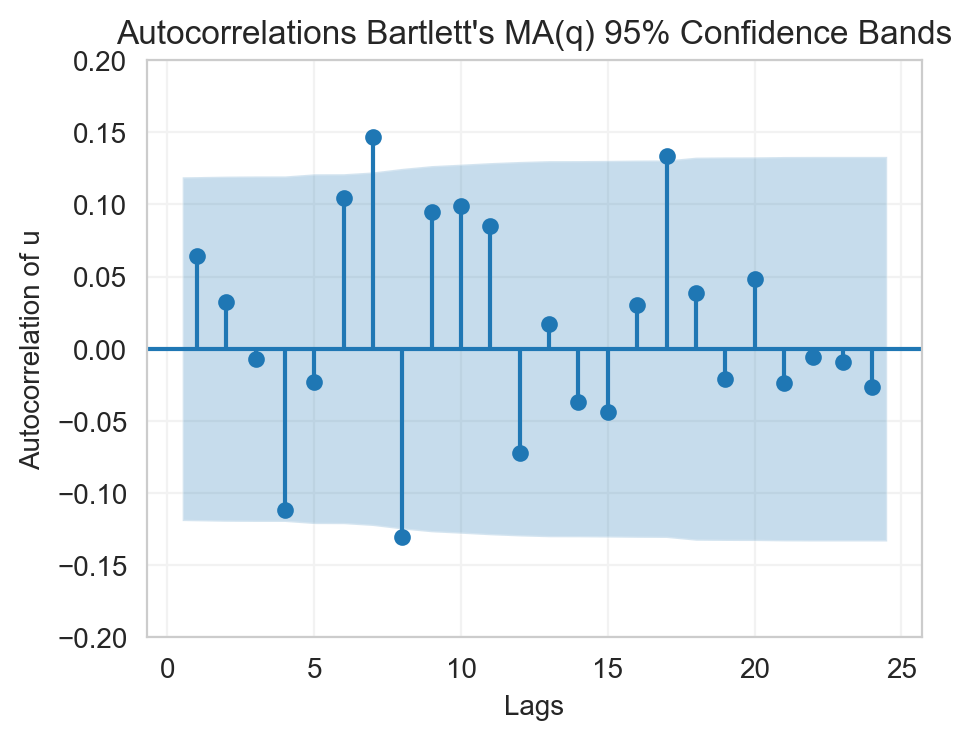

In [48]:
usm6=usm3.copy()
usm6=usm6.dropna(subset=['L1u','L2u','L1g'])
res=smf.ols('u~L1u+L2u+L1g+1',data=usm6).fit()
usm6['ehat']=res.resid
l=list(range(1,25))
fig=sm.graphics.tsa.plot_acf(usm6['ehat'].values.squeeze(),lags=l)
plt.ylim(-0.2,0.2)
plt.ylabel('Autocorrelation of u')
plt.xlabel('Lags')
plt.title('Autocorrelations Bartlett\'s MA(q) 95% Confidence Bands')
plt.show()

In [49]:
lags=[i for i in range(26)]
acf_val,q,pval=smt.acf(x=usm6.ehat,nlags=25,qstat=True,adjusted=True,fft=True)
z=2/np.sqrt(res.nobs)
cgram_u=pd.DataFrame({'Lag':lags[1:],'ACF':np.round(acf_val[1:],4),'z':z})
print('Autocorrelations for Unemployment')
print(tabulate(cgram_u,headers='keys'))

Autocorrelations for Unemployment
      Lag      ACF         z
--  -----  -------  --------
 0      1   0.0648  0.121491
 1      2   0.0327  0.121491
 2      3  -0.0072  0.121491
 3      4  -0.1134  0.121491
 4      5  -0.0237  0.121491
 5      6   0.1065  0.121491
 6      7   0.1502  0.121491
 7      8  -0.1344  0.121491
 8      9   0.0978  0.121491
 9     10   0.1023  0.121491
10     11   0.0888  0.121491
11     12  -0.0759  0.121491
12     13   0.0181  0.121491
13     14  -0.0391  0.121491
14     15  -0.0462  0.121491
15     16   0.0319  0.121491
16     17   0.1423  0.121491
17     18   0.0416  0.121491
18     19  -0.0228  0.121491
19     20   0.0523  0.121491
20     21  -0.0258  0.121491
21     22  -0.0065  0.121491
22     23  -0.0098  0.121491
23     24  -0.0294  0.121491
24     25  -0.0465  0.121491


In [50]:
print('Autocorrelations Outside the Confidence Bands')
print(tabulate(cgram_u.query('abs(ACF)>z'),headers='keys'))

Autocorrelations Outside the Confidence Bands
      Lag      ACF         z
--  -----  -------  --------
 6      7   0.1502  0.121491
 7      8  -0.1344  0.121491
16     17   0.1423  0.121491


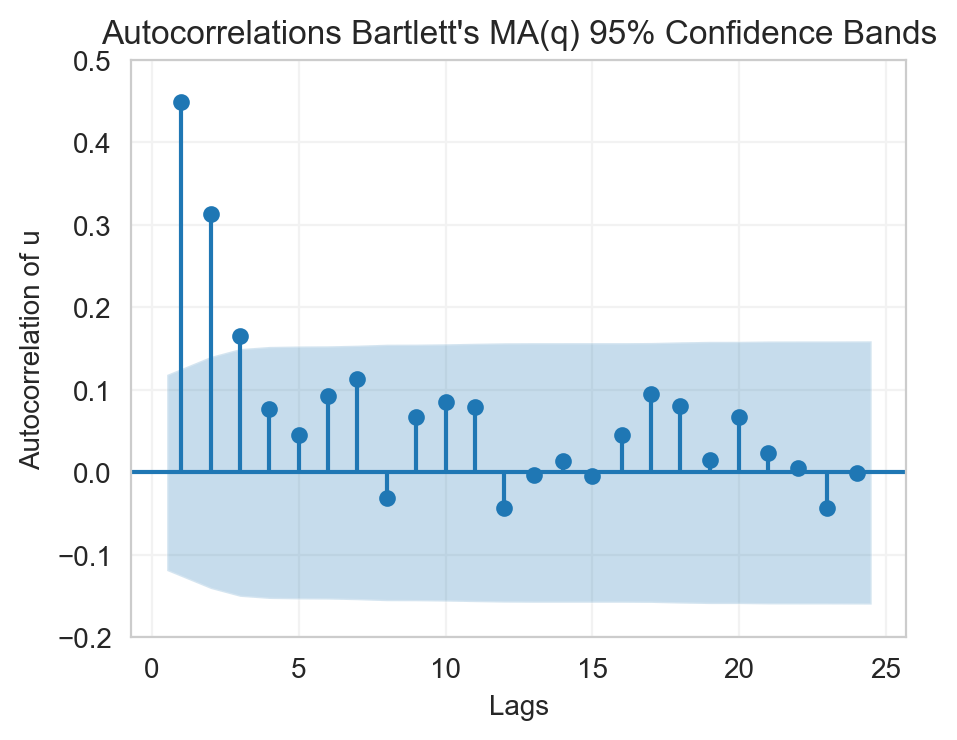

In [51]:
usm7=usm3.copy()
usm7=usm7.dropna(subset=['L1u','L1g'])
res=smf.ols('u~L1u+L1g+1',data=usm7).fit()
usm7['ehat']=res.resid
l=list(range(1,25))
fig=sm.graphics.tsa.plot_acf(usm7['ehat'].values.squeeze(),lags=l)
plt.ylabel('Autocorrelation of u')
plt.xlabel('Lags')
plt.title('Autocorrelations Bartlett\'s MA(q) 95% Confidence Bands')
plt.ylim(-0.2,0.5)
plt.show()

In [52]:
bgL1=sm.stats.diagnostic.acorr_breusch_godfrey(res,nlags=1)
bgL2=sm.stats.diagnostic.acorr_breusch_godfrey(res,nlags=2)
bgL3=sm.stats.diagnostic.acorr_breusch_godfrey(res,nlags=3)
bgL4=sm.stats.diagnostic.acorr_breusch_godfrey(res,nlags=4)
tab1_data=[
    [1,'{:.5}'.format(bgL1[0]),1,'{:.5}'.format(bgL1[1])],
    [2,'{:.5}'.format(bgL2[0]),2,'{:.5}'.format(bgL2[1])],
    [3,'{:.5}'.format(bgL3[0]),3,'{:.5}'.format(bgL3[1])],
    [4,'{:.5}'.format(bgL4[0]),4,'{:.5}'.format(bgL4[1])]
     ]
col_names=['Lags','chi2','df','Prob>chi2']
print('Breusch-Godfrey LM Test for Autocorrelation')
print('H_0: No Serial Correlation')
print(tabulate(tab1_data,headers=col_names),'\n')

Breusch-Godfrey LM Test for Autocorrelation
H_0: No Serial Correlation
  Lags    chi2    df    Prob>chi2
------  ------  ----  -----------
     1  66.9       1   2.8565e-16
     2  73.376     2   1.1656e-16
     3  73.38      3   8.0589e-16
     4  73.55      4   4.0367e-15 



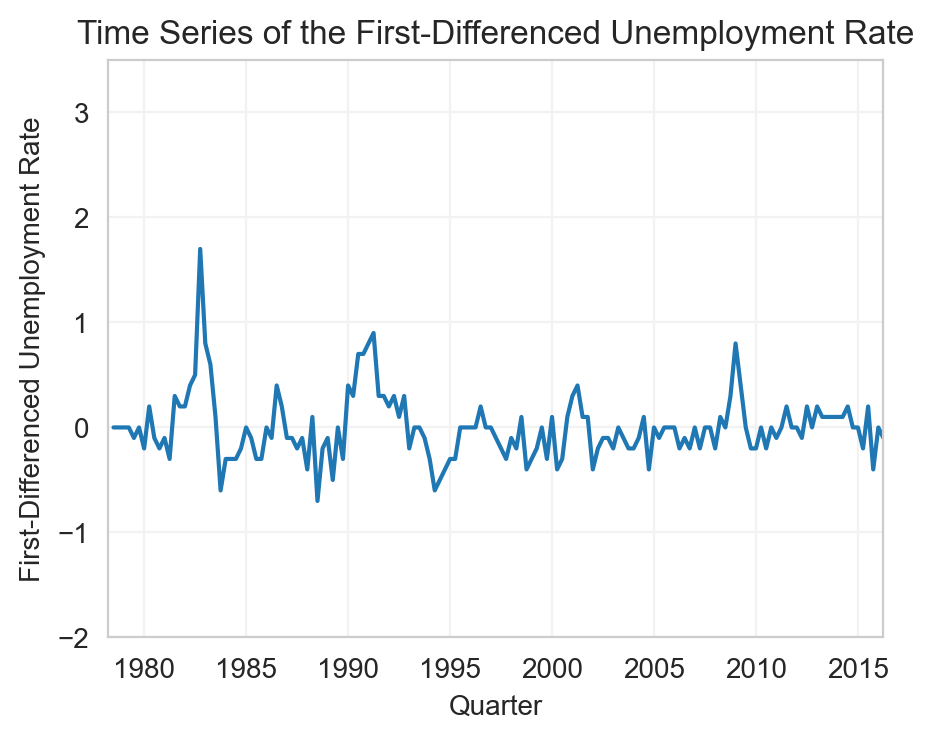

In [53]:
oku=pd.read_csv(poe5csv+'okun5_aus.csv')
oku['dateid01']=pd.to_datetime(oku['dateid01'],format='%m/%d/%Y')
oku=oku.set_index('dateid01')
oku['D1u']=oku['u'].diff(1)
fig=oku.D1u.plot(x=oku.index)
plt.ylim(-2,3.5)
plt.xlabel('Quarter')
plt.ylabel('First-Differenced Unemployment Rate')
plt.title('Time Series of the First-Differenced Unemployment Rate')
plt.show()

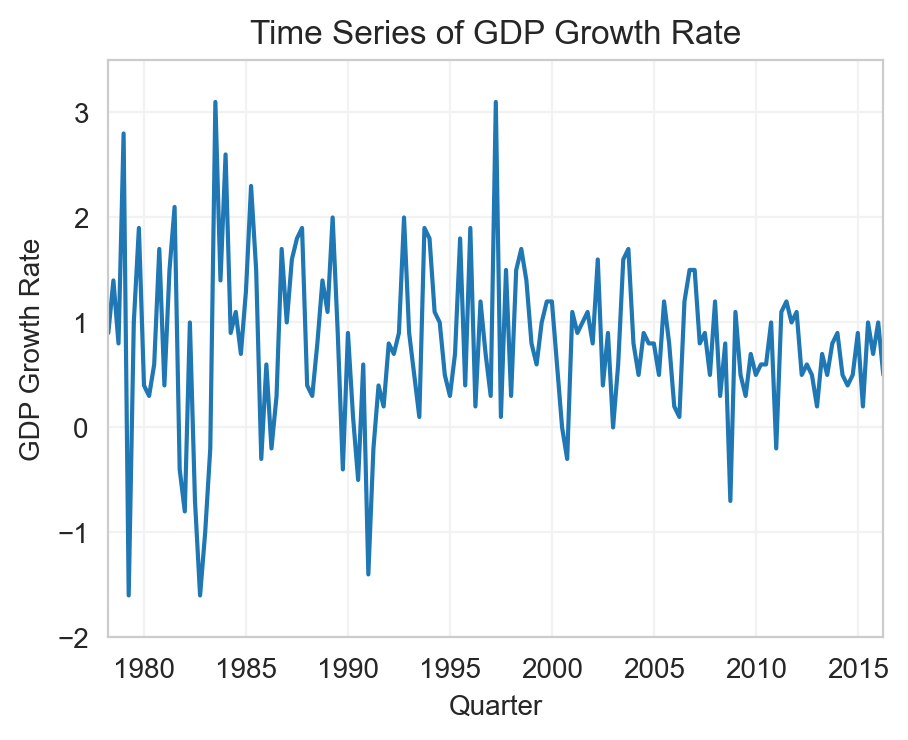

In [54]:
fig=oku.g.plot(x=oku.index)
plt.ylim(-2,3.5)
plt.xlabel('Quarter')
plt.ylabel('GDP Growth Rate')
plt.title('Time Series of GDP Growth Rate')
plt.show()

In [55]:
for i in range(1,6):
    oku['L'+str(i)+'g']=oku['g'].shift(i)
res=smf.ols('D1u~g+L1g+L2g+L3g+L4g+L5g+1',data=oku,missing='drop').fit()
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3930      0.045      8.746      0.000       0.304       0.482
g             -0.1287      0.026     -5.037      0.000      -0.179      -0.078
L1g           -0.1721      0.025     -6.915      0.000      -0.221      -0.123
L2g           -0.0932      0.024     -3.865      0.000      -0.141      -0.046
L3g           -0.0726      0.024     -3.012      0.003      -0.120      -0.025
L4g           -0.0636      0.024     -2.644      0.009      -0.111      -0.016
L5g            0.0232      0.024      0.966      0.336      -0.024       0.071


In [56]:
res=smf.ols('D1u~g+L1g+L2g+L3g+L4g+1',data=oku,missing='drop').fit()
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4100      0.042      9.867      0.000       0.328       0.492
g             -0.1310      0.024     -5.369      0.000      -0.179      -0.083
L1g           -0.1715      0.024     -7.161      0.000      -0.219      -0.124
L2g           -0.0940      0.024     -3.912      0.000      -0.141      -0.047
L3g           -0.0700      0.024     -2.929      0.004      -0.117      -0.023
L4g           -0.0611      0.024     -2.563      0.011      -0.108      -0.014


In [57]:
g0=res.params.iloc[1]
g1=g0+res.params.iloc[2]
g2=g1+res.params.iloc[3]
g3=g2+res.params.iloc[4]
g4=g3+res.params.iloc[5]
print(f'g0     = {g0:.6f}')
print(f'g1     = {g1:.6f}')
print(f'g2     = {g2:.6f}')
print(f'g3     = {g3:.6f}')
print(f'g4     = {g4:.6f}')
print(f'growth = {res.params.iloc[0]/g4:.6}')

g0     = -0.131001
g1     = -0.302526
g2     = -0.396521
g3     = -0.466539
g4     = -0.527628
growth = -0.776972


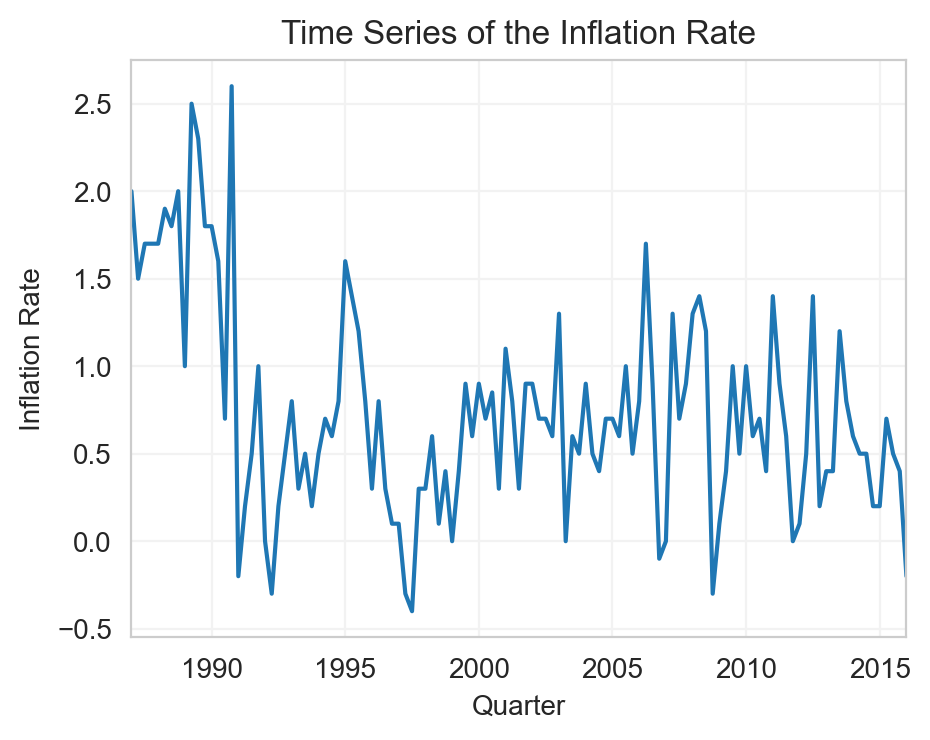

In [58]:
phi=pd.read_csv(poe5csv+'phillips5_aus.csv')
qtr=pd.date_range(start='1/1/1987',end='1/1/2016',freq='QS')
for i in qtr:
    i.date()
phi['qtr']=pd.DataFrame(qtr)
phi=phi.set_index('qtr').to_period('Q')
phi.inf.plot(x=phi.index)
plt.xlabel('Quarter')
plt.ylabel('Inflation Rate')
plt.title('Time Series of the Inflation Rate')
plt.show()

In [59]:
phi['infl']=phi['inf']
res1=smf.ols('infl~du+1',missing='drop',data=phi).fit()
B=round(4*pow(res.nobs/100,2/9),0)
res2=res1.get_robustcov_results(cov_type='HAC',maxlags=5)
print('Bandwidth Selection for Newey-West Estimator',B)
print(summary_col([res1,res2],stars=True,model_names=('1-LS','2-HAC'),float_format='%.3f',))

Bandwidth Selection for Newey-West Estimator 4.0

                 1-LS    2-HAC  
--------------------------------
Intercept      0.732*** 0.732***
               (0.056)  (0.097) 
du             -0.399*  -0.399  
               (0.206)  (0.289) 
R-squared      0.032    0.032   
R-squared Adj. 0.023    0.023   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [60]:
phi1=phi.copy()
phi1['L1inf']=phi1.inf.shift(1)
phi1['L1du']=phi1.du.shift(1)
phi1=phi1.dropna()
inf=np.asarray(phi1.inf)
L1inf=np.asarray(phi1.L1inf)
du=np.asarray(phi1.du)
L1du=np.asarray(phi1.L1du)
def residual(params,inf,L1inf,du,L1du):
    a1=params['a1']
    b0=params['b0']
    rho=params['rho']
    model=a1*(1-rho)+b0*du+rho*L1inf-rho*b0*L1du
    return (inf-model)
params=Parameters()
params.add('a1',value=1.0)
params.add('b0',value=1.0)
params.add('rho',value=1.0)
out=minimize(residual,params,args=(inf,L1inf,du,L1du))
report_fit(out)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 116
    # variables        = 3
    chi-square         = 30.1948909
    reduced chi-square = 0.26721142
    Akaike info crit   = -150.126425
    Bayesian info crit = -141.865654
[[Variables]]
    a1:   0.70284652 +/- 0.09631802 (13.70%) (init = 1)
    b0:  -0.38302193 +/- 0.21045912 (54.95%) (init = 1)
    rho:  0.50006377 +/- 0.08093561 (16.19%) (init = 1)


In [61]:
delta1=out.params['a1'].value*(1-out.params['rho'])
delta2=out.params['rho']*out.params['b0']
print(f'Estimate of delta1:  {delta1:.5}')
print(f'Estimate of delta2:  {-delta2:.5}')

Estimate of delta1:  0.35138
Estimate of delta2:  0.19154


In [62]:
resGLSAR=sm.GLSAR.from_formula('infl~du+1',rho=1,missing='drop',data=phi
                              ).iterative_fit(maxiter=2)
resARIMA100=ARIMA(phi['infl'],phi['du'],order=(1,0,0),missing='drop',freq='QE').fit()
print('Regression Results: OLS-HAC, 2-Step, and ARIMA')
print(summary_col([res2,resGLSAR,resARIMA100],stars=True,
                  model_names=('1-HAC','2-Step','3-ARIMA'),
                  float_format='%.3f',))

Regression Results: OLS-HAC, 2-Step, and ARIMA

                1-HAC    2-Step  3-ARIMA 
-----------------------------------------
Intercept      0.732*** 0.703***         
               (0.097)  (0.094)          
du             -0.399   -0.383*  -0.395* 
               (0.289)  (0.209)  (0.205) 
const                            0.734***
                                 (0.112) 
ar.L1                            0.514***
                                 (0.079) 
sigma2                           0.268***
                                 (0.028) 
R-squared      0.032    0.029            
R-squared Adj. 0.023    0.020            
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [63]:
coinc=pd.read_csv(poe5csv+'cons_inc.csv',sep = ',')
coinc['qtr']=pd.date_range(start='1959/07/01',end='2016/07/01',freq='QS').to_period('Q')
coinc=coinc.set_index('qtr')
coinc['D1c']=coinc['cons'].diff(1)
coinc['L1D1c']=coinc['D1c'].shift(1)
coinc['D1y']=coinc['y'].diff(1)
res=smf.ols('D1c~L1D1c+D1y+1',missing='drop',data=coinc).fit()
print(res.summary(slim=True))
coinc['nuhat']=res.resid

                            OLS Regression Results                            
Dep. Variable:                    D1c   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.214
No. Observations:                 227   F-statistic:                     31.85
Covariance Type:            nonrobust   Prob (F-statistic):           6.72e-13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    478.6115     74.198      6.450      0.000     332.397     624.826
L1D1c          0.3369      0.060      5.628      0.000       0.219       0.455
D1y            0.0991      0.022      4.599      0.000       0.057       0.142

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+03. This might indicate that there are
strong multicollinearity or ot

In [64]:
bgL1=sm.stats.diagnostic.acorr_breusch_godfrey(res,nlags=1)
bgL2=sm.stats.diagnostic.acorr_breusch_godfrey(res,nlags=2)
bgL3=sm.stats.diagnostic.acorr_breusch_godfrey(res,nlags=3)
bgL4=sm.stats.diagnostic.acorr_breusch_godfrey(res,nlags=4)
tab1_data=[
    [1,bgL1[0],1,bgL1[1]],
    [2,bgL2[0],2,bgL2[1]],
    [3,bgL3[0],3,bgL3[1]],
    [4,bgL4[0],4,bgL4[1]]
     ]
col_names=['Lags','chi2','df','Prob>chi2']
print('Breusch-Godfrey LM Test for Autocorrelation')
print('H0: No Serial Correlation')
print(tabulate(tab1_data,headers=col_names),'\n')

Breusch-Godfrey LM Test for Autocorrelation
H0: No Serial Correlation
  Lags     chi2    df    Prob>chi2
------  -------  ----  -----------
     1  1.49106     1     0.222052
     2  1.49473     2     0.473612
     3  5.05332     3     0.167934
     4  5.15594     4     0.271668 



In [65]:
print(f'impact     = {res.params.iloc[2]:.6}')
print(f'delay1     = {res.params.iloc[1]*res.params.iloc[2]:.6}')
print(f'delay2     = {res.params.iloc[1]**2*res.params.iloc[2]:.6}')
print(f'total_Mult = {res.params.iloc[2]/(1-res.params.iloc[1]):.7}') 

impact     = 0.0990818
delay1     = 0.0333809
delay2     = 0.0112461
total_Mult = 0.1494226


In [66]:
coinc['ehat']=np.nan
coinc.iloc[2,8]=coinc.iloc[2,7]
for i in range(3,len(coinc['ehat'])):
    coinc.iloc[i,8]=coinc.iloc[i,7]+res.params.iloc[1]*coinc.iloc[i-1,8]
coinc['L1ehat']=coinc.ehat.shift(1)
coinc['Intercept']=1
res=sm.OLS(coinc.nuhat,coinc[['Intercept','L1D1c','D1y','L1ehat']],missing='drop').fit()
chi_stat=(res.nobs-1)*res.rsquared
print(f'Chi-squared test statistic: {chi_stat:.4}')
pval=1-stats.chi2.cdf(chi_stat,1)
print(f'  p-value                 : {pval:.4}')

Chi-squared test statistic: 0.05431
  p-value                 : 0.8157


In [67]:
oku['D1L1u']=oku['D1u'].shift(1)
oku['D1L2u']=oku['D1u'].shift(2)
res=smf.ols('D1u~D1L1u+D1L2u+g+L1g+1',data=oku,missing='drop').fit()
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1708      0.033      5.206      0.000       0.106       0.236
D1L1u          0.2639      0.077      3.442      0.001       0.112       0.416
D1L2u          0.2072      0.072      2.878      0.005       0.065       0.350
g             -0.0904      0.024     -3.703      0.000      -0.139      -0.042
L1g           -0.1296      0.025     -5.140      0.000      -0.180      -0.080


In [68]:
oku['multi']=np.nan
oku.iloc[0,10]=res.params.iloc[3]
oku.iloc[1,10]=oku.iloc[0,10]*res.params.iloc[1]+res.params.iloc[4]
oku.iloc[2,10]=oku.iloc[1,10]*res.params.iloc[1]+oku.iloc[0,10]*res.params.iloc[2]
for i in range(2,12):
    oku.iloc[i,10]=oku.iloc[i-1,10]*res.params.iloc[1]+oku.iloc[i-2,10]*res.params.iloc[2]
oku['lag']=0
for j in range(0,12):
    oku.iloc[j,11]=j
print(oku['multi'].head(12))

dateid01
1978-04-01   -0.090400
1978-07-01   -0.153508
1978-10-01   -0.059252
1979-01-01   -0.047452
1979-04-01   -0.024804
1979-07-01   -0.016381
1979-10-01   -0.009464
1980-01-01   -0.005893
1980-04-01   -0.003517
1980-07-01   -0.002149
1980-10-01   -0.001296
1981-01-01   -0.000788
Name: multi, dtype: float64


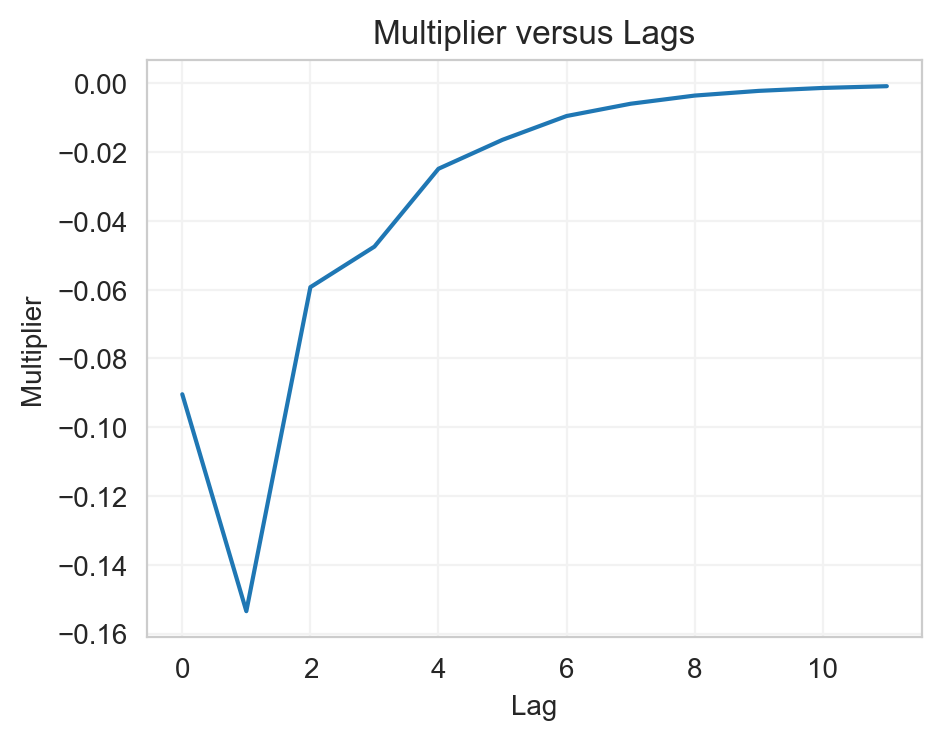

In [69]:
fig=sns.lineplot(x=oku['lag'],y=oku['multi'])
plt.xlabel('Lag')
plt.ylabel('Multiplier')
plt.title('Multiplier versus Lags')
plt.show()

In [70]:
print(f'Long-Run Multiplier: {oku.multi.sum():.5}')
print(f'''Alpha:                {res.params.iloc[0]/(1-res.params.iloc[1]-
                                                     res.params.iloc[2]):.5}''')
print(f'''Growth:               {-(res.params.iloc[0]/
                                   (1-res.params.iloc[1]-res.params.iloc[2])
                                  )/oku.multi.sum():.5}''')

Long-Run Multiplier: -0.4149
Alpha:                0.32296
Growth:               0.7784


In [71]:
oku['uhat']=res.resid
oku['ehat']=0
oku['ehat']=oku['ehat'].astype(float)
for i in range(3,153):
    oku.iloc[i,13]=(res.params.iloc[1]*oku.iloc[i-1,13]+res.params.iloc[2]*oku.iloc[i-2,13]+
                    oku.iloc[i,12])
oku['L1ehat']=oku['ehat'].shift(1)
oku['L2ehat']=oku['ehat'].shift(2)
res=smf.ols('uhat~D1L1u+D1L2u+g+L1g+L1ehat+L2ehat+1',data=oku,missing='drop').fit()
chi_stat = (res.nobs-3)*res.rsquared
print('Chi2 test statistic = ', '{:.6}'.format(chi_stat))
pval=1-stats.chi2.cdf(chi_stat,2)
print('   Prob>Chi2        = ','{:.3}'.format(pval))

Chi2 test statistic =  3.071
   Prob>Chi2        =  0.215


In [72]:
phi=pd.read_csv(poe5csv+'phillips5_aus.csv')
phi['dateid01']=pd.to_datetime(phi['dateid01'],format='%m/%d/%Y')
phi=phi.set_index('dateid01')
phi['infl']=phi['inf']
res=smf.ols('infl~du+1',data=phi,missing='drop').fit()
print(res.summary().tables[1])
print(res.summary().tables[2],'\n')
dw=durbin_watson(res.resid)
print(f'''Durbin-Watson Test Statistic: 
d-statistic({int(res.df_model+1)},{int(res.nobs)})={dw:.3}''')

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7317      0.056     13.053      0.000       0.621       0.843
du            -0.3987      0.206     -1.935      0.055      -0.807       0.009
Omnibus:                       15.604   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.496
Skew:                           0.847   Prob(JB):                     0.000159
Kurtosis:                       3.848   Cond. No.                         3.69

Durbin-Watson Test Statistic: 
d-statistic(2,117)=0.965
